##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Clasificacion Basica: Predecir una imagen de moda

En este notebook entrenaremos una red neuronal para clasificar imagenes de ropa como zapatillas y camisetas.

Utilizamos [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel para construir y entrenar modelos en Tensorflow.

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aquí:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Aquí, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar el accuracy del modelo cuando le pasamos datos nuevos.

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Al cargar el dataset obtenemos cuatro arrays:

* Los arrays `train_images` y `train_labels` son el *training set* — los datos que el modelo usa para aprender.
* Los arrays `test_images` y `test_labels` son el *test set* - contra el cual testeamos nuestro modelos

Las imagenes son arrays de NumPy de 28x28, con valores de pixeles que varian de 0 a 255. Los *labels* son un arrays de integers, que van del 0 al 9.

Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta.

Los *Class names* no estan incluidoen el dataset, entonces los almacenamos para usarlos luego cuando se visualicen las imagenes:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Explorar el dataset

Exploramos el dataset antes de empezar a entrenar el modelo.

Hay 60,000 imagenes en el train set, cada imagen representada por pixeles de 28x28:

In [ ]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [ ]:
len(train_labels)

60000

Cada etiqueta es un integer entre 0 y 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el test set.

Otra vez, cada imagen es representada como pixeles de 28x28:

In [ ]:
train_images.shape[1]

28

In [ ]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Pre-procesar el dataset

El dataset debe ser pre-procesado antes de entrenar la red neuronal.

Si inspeccionamos la primera imagen en el train set, vemos que los valores de los pixeles están entre 0 y 255:

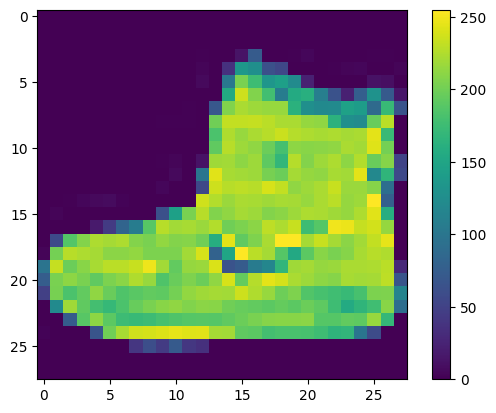

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Estandarizamos estos valores en un rango de 0 a 1 antes de pasarselos a la red neuronal.

Para hacero, dividimos los valores por 255.

Es importante que el *train set* y el *test set* se pre-procesen de la misma forma:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el dataset está en el formato adecuado y que estamos listos para construir y entrenar la red, vamos a visualizar las primeras 25 imagenes del *train set* y visualizamos el nombre de cada clase debajo de cada imagen.

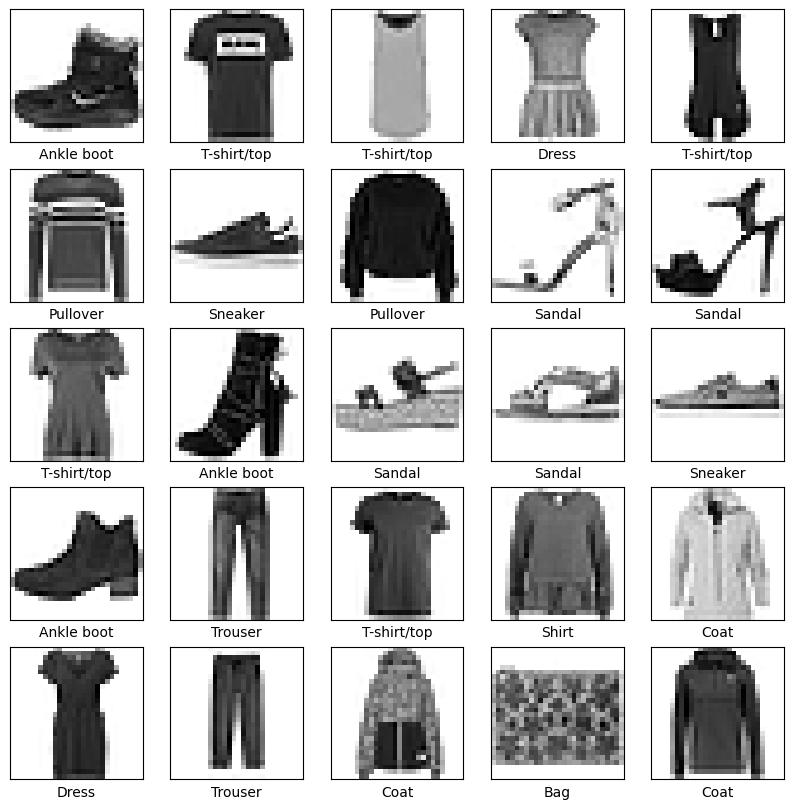

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Para construir la red neuronal necesitamos configurar las capas (layers) del modelo, y luego compilar el modelo.

## Configurar las Capas

Los bloques basicos de una red neuronal son las capas o layers.

En la mayoria de los casos, construir una red neuronal profunda consiste en juntar varias capas sencillas.

Aquí utilizamos tf.keras.layers.Dense para construir una red neuronal de este tipo:
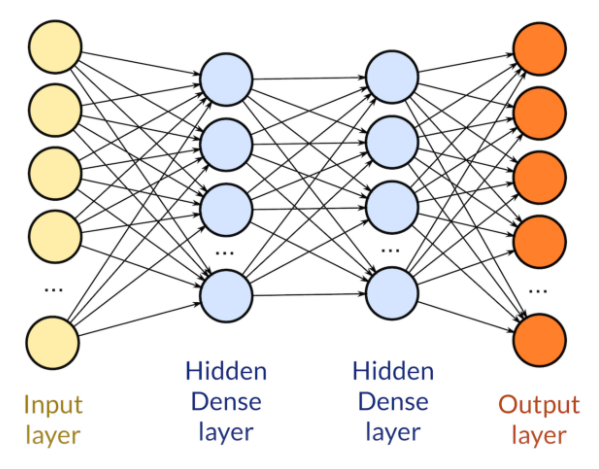

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa, `tf.keras.layers.Flatten`,
transforma las imagenes de un array bi-dimensional (de 28x28 pixeles) a un array uni -dimensional (de 28*28 pixeles = 784 pixeles).

Esto corresponde a "aplanar" nuestras imagenes.

Despues de haber "aplanado" los pixeles, tenemos dos capas `tf.keras.layers.Dense` que están densamente conectadas.

La primera capa `Dense` tiene 128 nodos (o neuronas).

La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un array de 10 probabilidades que suman a 1. Cada nodo contiene un score que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

La función softmax se utiliza normalmente como capa final de los clasificadores basados en redes neuronales. Convierte un array de K valores reales en un array de K valores reales que suman 1.

### Compilar el modelo

Antes de empezar a entrenar el modelo, necesitamos configurar algunos elementos más:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses)— Mide que tan exacto es el modelo durante el entrenamiento. Queremos minimizar esta función. Las más comunes son:
  - ‘binary_crossentropy‘ para la clasificación binaria
  - ‘sparse_categorical_crossentropy‘ para multi-class classification
  - ‘mse‘ (mean squared error) para regresiones
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) — Es la técnica que se usa para minimizar la loss function. Aquí usaremos `ADAM`, que utiliza una tasa de aprendizaje adaptable, lo que significa que calcula tasas de aprendizaje individuales para diferentes parámetros.
* [*Métricas*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — Se usan para monitorear los pasos de train y test.
Nuestro ejemplo usa el *accuracy* cómo métrica, el ratio de imagenes que son correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Los datos de entrenamiento entran en el modelo. En nuestro ejemplo, los datos de train están en los arrays `train_images` y `train_labels`.
2. El modelo aprende a asociar imagenes y etiquetas.
3. Le pedimos al modelo que haga predicciones sobre el dataset de test, que está en el array `test_images`. Verifique que las predicciones sean iguales a las etiquetas del array `test_labels`.

Para comenzar a entrenar, llamamos el metodo `model.fit`, llamado asi por que *fit* (ajusta) el modelo al set de datos de entrenamiento:

In [ ]:
model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5053 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3769 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3396 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3145 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2954 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2828 - accuracy: 0.8940
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2700 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2581 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2489 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.241

Aquí seleccionamos la configuración de entrenamiento, en este caso el número de épocas (iteraciones), y verbose, que puede ser:
- 0 = silencioso
- 1 = barra de progreso
- 2 = una línea por época, con un resumen de la performance en cada iteración

A medida que el modelo entrena, visualizamos la perdida (loss) y la métrica seleccionada (accuracy).

El entrenamiento (fit) aplica el algoritmo de optimización elegido para minimizar la loss function elegida y actualiza el modelo utilizando el algoritmo de back-propagation del error.

El entrenamiento es la parte más lenta de todo el proceso, y puede tardar segundos, horas o días, dependiendo de la complejidad del modelo, el hardware que esté usando y el tamaño del train set.

## Evaluar Accuracy

Para evaluar el modelo seleccionamos el conjunto de datos contra el cual testear (test set). Tienen que ser datos que no se usen en el proceso de entrenamiento, para que podamos obtener una estimación imparcial del rendimiento del modelo al hacer predicciones sobre nuevos datos.

La velocidad de evaluación del modelo es proporcional a la cantidad de datos que utilizamos para la evaluación, aunque es mucho más rápido que el entrenamiento ya que el modelo no cambia.

Aquí estamos evaluando el accuracy de nuestro modelo:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3387 - accuracy: 0.8841 - 646ms/epoch - 2ms/step

Test accuracy: 0.8841000199317932


Resulta que el accuracy sobre el test set es un poco menor que el accuracy sobre el train set.

Esta diferencia entre train y test se debe al *overfitting* (sobre ajuste).

El overfitting ocurre cuando un modelo de machine learning tiene un peor rendimiento sobre un set de datos nuevo, que nunca antes ha visto, comparado con el set de entrenamiento.

## Hacer predicciones

Este es el paso final en el ciclo de vida de nuestro modelo. Es la razón por la que queremos el modelo en primer lugar.

Necesitamos pasarle los datos para los cuales queremos una predicción, es decir los datos de entrada sin tener las etiquetas objetivo.

Simplemente llamamos a la función *predict()* para predecir, y el output será una etiqueta de clase, probabilidad o valor numérico (depende de cual es el objetivo de nuestro modelo):

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


El modelo ha predecido la etiqueta para cada imagen en el dataset de *test*.

 Miremos la primera prediccion:

In [ ]:
predictions[0]

array([1.2328512e-07, 5.2011678e-10, 2.6874734e-09, 1.6927205e-08,
       2.9785106e-08, 1.3224621e-03, 2.1041469e-08, 1.7846522e-03,
       6.9868456e-08, 9.9689257e-01], dtype=float32)

Una prediccion es un array de 10 números.

Estos números representan la probabilidad, según el modelo, que la imagen pertenezca a una determinada clase de ropa.

Podemos mirar a qué clase corresponde el mayor nivel de confianza:

In [ ]:
np.argmax(predictions[0])

9

En este caso, el nivel de confiaza más alto corresponde a la clase 9 ("ankle boot" o `class_names[9]`).

Examinando las etiquetas del dataset *test*, vemos que esta clasificación es correcta:

In [ ]:
test_labels[0]

9

Queremos visualizar la predicción para cada una de las 10 clases:

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # junto a la imagen, queremos visualizar la predicción con confianza más alta
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # etiqueta predecida
                                100*np.max(predictions_array), # nivel de confianza
                                class_names[true_label]), # etiqueta real
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  # visualizamos el nivel de confianza para todas las clases (color grís)
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  # la etiqueta predecida y la real, en rojo y azul respectivamente
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Visualizar las predicciones

Miramos la imagen [0] y sus predicciones.

Las etiquetas correctas están en azul y las incorrectas están en rojo. El numero representa el porcentaje (sobre 100) para la etiqueta predecida.

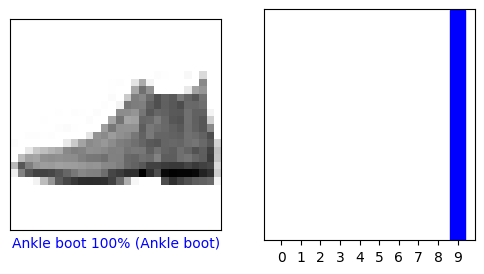

In [ ]:
# el indice representa la imagen que queremos visualizar
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# visualizamos la imagen, la etiqueta predecida y la real
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
# visualizamos el nivel de confianza para las 10 clases
plot_value_array(i, predictions[i],  test_labels)
plt.show()

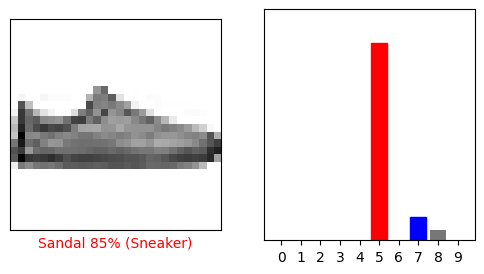

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a visualizar más imagenes con sus predicciones.

Fijaros que el modelo puede estar equivocado, aún teniendo mucha confianza.

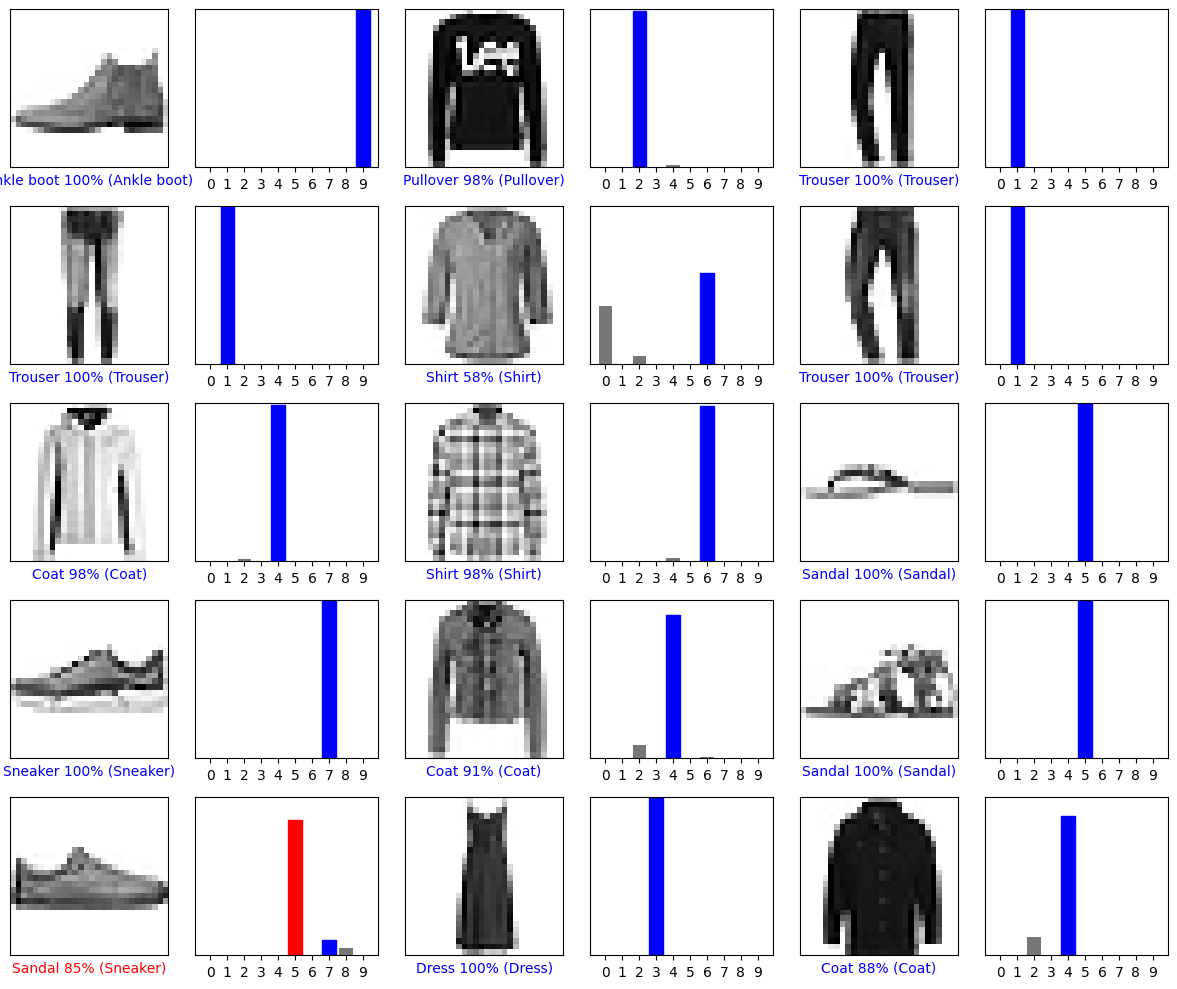

In [ ]:
# visualizamos las primeras X imagenes, las etiquetas predecidas y las etiquetas reales.
# Las etiquetas correctas están en azul, las incorrectas en rojo.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Aplicar el modelo a una sóla imagen

Usamos el modelo entrenado para hacer una predicción sobre una única imagen:

In [ ]:
# elegimos una imagen de nuestro dataset
img = test_images[4]

print(img.shape)

(28, 28)


Aunque estemos usando una sóla imagen, tiene que ser parte de una lista:

In [ ]:
#añadimos la imagen a una lista
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora predecimos la etiqueta para esta imagen:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 35ms/step
[[3.6551037e-01 1.5688876e-07 5.1880963e-02 2.6417540e-03 4.7996999e-03
  1.2749200e-07 5.7501316e-01 2.4656691e-08 1.5338084e-04 4.4046135e-07]]


Y la visualizamos:

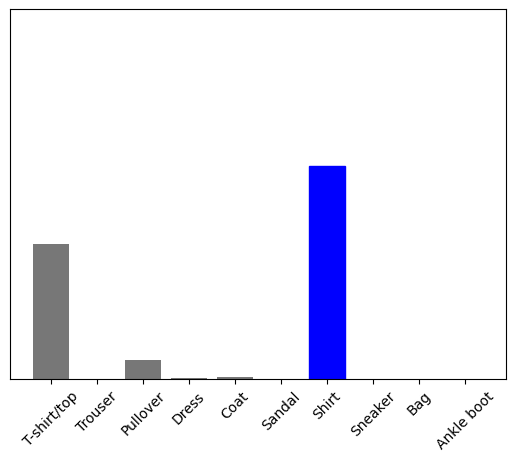

In [ ]:
plot_value_array(4, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Buscamos la etiqueta con mayor nivel de confianza:

In [ ]:
np.argmax(predictions_single[0])

6

Y el modelo predice la etiqueta 2, que efectivamente corresponde a la etiqueta real.

In [ ]:
test_labels[4]

6

En conclusión, podemos resumir el flujo de modelización en los siguientes pasos:
- método *compile*, para definir elementos cómo loss function, optimizador y métrica
- método *fit*, para entrenar el modelo con datos y etiquetas de train
- método *evaluate*, que nos devuelve la loss y la métrica para los datos de test
- método *predict*, devuelve las predicciones (output) para los datos de test (input)


En este enlace tenemos más detalle sobre estos métodos: https://keras.io/api/models/model_training_apis/